# Softmax Regression
- for k class labels, the input feature vector goes through k differetn linear combinations, one per each class label
- The k values are passed through softmax activation, which return a probability vector constianing k components
  - The i-th component denotes the probability of an input sample belonging to class label i

In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

## Training Data

In [2]:
(train_X, train_y),(test_X,test_y)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


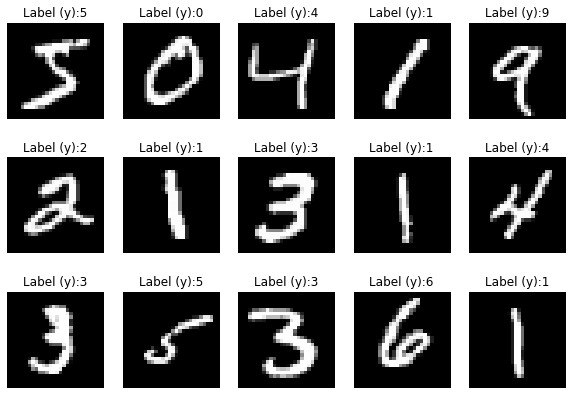

In [3]:
#Plotting some data samples
fig = plt.figure(figsize=(10,7))
for i in range(15):
  ax=fig.add_subplot(3,5,i+1)
  ax.imshow(train_X[i],cmap=plt.get_cmap('gray'))
  ax.set_title('Label (y):{y}'.format(y=train_y[i]))
  plt.axis('off')

In [4]:
X_train = train_X.reshape(train_X.shape[0],28*28)
X_test = test_X.reshape(test_X.shape[0],28*28)

In [5]:
#Normalizing
X_train=X_train/255
X_test = X_test/255

For softmax regression. label y needs to be represented un one-hot encoding

In [6]:
def convert_to_one_hot_encoding(y,k):
  #A zero matrix of size (m,k)
  y_one_hot= np.zeros((len(y),k))
  #Putting 1 for column where the label is using multidimensional indexing
  y_one_hot[np.arange(len(y)),y]=1
  return y_one_hot

## Model

The softmax regression has two stages:
1. Linear combination (in vectorized form)
$$Z_{n \times k} = X_{n \times m}W_{m \times k}+b_{k \times 1}$$
2. Softmax non-linear transformation
$$softmax(Z) = \frac{exp(Z)}{\sum exp(Z)}$$

Softmax classifier provides a probability of an example belonging to a xlass:
$$p(y=q|x;W,b)=\frac{exp(z_q)}{\sum_k exp(z_k)}$$

### Softmax Regression Implementation

**Step:1**In vectorized form we implement $Z=XW+b$
Each class has m+1 parameters, one bia and m weights corresponding to m features

In [7]:
def linear_combinations(X,w,b):
  return X@w+b

**Step:2** Calculate the softmax for each class using the above formula.
> - The sum of softmax across all classes for a given sample is 1
> - The class label with the highest value of softmax is assigned to the sample

**Note:** Every class has a different set of weights and a bias.

In [8]:
def softmax(z):
  #z--> linear part
  ## subtracting the max of z for numerical stability
  exp =np.exp(z-np.max(z))

  # Calculating softmax for all examples
  for i in range(len(z)):
    exp[i] /=np.sum(exp[i])

  return exp

## Loss function: categorical cross entropy loss
Cross-entropy loss
$$J(W,b) = -\sum_k y_klog(\hat{y}_k)$$

##Optimization

Softmax is two stage process
- Linear combination
- Non-linear transformation-softmax(z)

The Weights W[j,i] and b[i] are used for calculating z[i]:
$$z[i] = b[i]+x[1]W[1,i]+x[2]W[2,i]+.....x[m]W[m,i]\\
= b[i]+\sum_{j=1}^mx[j]W[j,i]$$

And z[i] is used for softmax calculation in numerator for i-th class and in denominators of all classes.
$$softmax(z[i]) = \frac{exp(z[i])}{\sum_kexp(z[i,k])}$$

$$\frac{\partial J(W,b)}{\partial W[j,i]} = x[j](\hat{y}][i]-y[i])$$

$$\frac{\partial J(W,b)}{\partial W} = X^T(\hat{Y}-Y)$$
$$\frac{\partial J(W,b)}{\partial b} = (\hat{Y}-Y)$$

## Training
1. Initialize parameters w an b

In [9]:
def fit(X,y,lr,c,epochs):
  n,m = X.shape
  #Initializing weiths and bias randomly
  w=np.random.random((m,c))
  b=np.random.random(c)

  losses=[]

  for epoch in range(epochs):
    #Calculating hypothesis/prediction
    z=X@w+b
    y_hat= softmax(z)

    #One-hot encoding of y
    y_hot = convert_to_one_hot_encoding(y,c)

    #Calculating the gradient of loss w.r.t w and b
    w_grad = (1/n)*np.dot(X.T,(y_hat-y_hot))
    b_grad = (1/n)*np.sum(y_hat-y_hot)

    #Updating the parameters
    w=w-lr*w_grad
    b=b-lr*b_grad

    #Calculating the loss and appending it in the list.
    loss= -np.mean(np.log(y_hat[np.arange(len(y)),y]))
    losses.append(loss)
    #Printing the loss at every 100th iterations
    if epoch%10==0:
      print('Epoch{epoch}===> Loss={loss}'.format(epoch=epoch, loss=loss))
  return w,b,losses

def predict(X,w,b):
  z=X@w+b
  y_hat=softmax(z)
  return np.argmax(y_hat,axis=1)

def accuracy(y,y_hat):
  return np.sum(y==y_hat)/len(y)



## Training digit recognizer on MNIST dataset

In [10]:
W,b,l = fit(X_train, train_y, lr=0.9,c=10,epochs=100)

Epoch0===> Loss=4.423372589252938
Epoch10===> Loss=0.9996472296011919
Epoch20===> Loss=0.6649330228646158
Epoch30===> Loss=0.5734893075816997
Epoch40===> Loss=0.526227810834881
Epoch50===> Loss=0.4945798817907618
Epoch60===> Loss=0.47140269556353315
Epoch70===> Loss=0.453468579803021
Epoch80===> Loss=0.4390507654232763
Epoch90===> Loss=0.42712881664157115


### Learning Curve

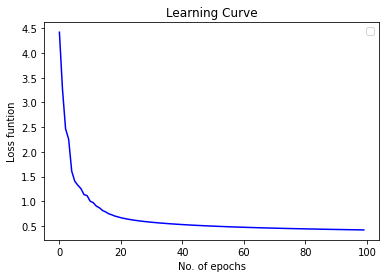

In [11]:
plt.figure()
plt.xlabel('No. of epochs')
plt.ylabel('Loss funtion')
plt.title('Learning Curve')
plt.legend('Training Loss')
plt.plot(np.arange(len(l)),l,'b-')
plt.show()

In [12]:
#Accuracy for training set
train_preds = predict(X_train,W,b)
print('Accuracy for training set: ', accuracy(train_y, train_preds))

Accuracy for training set:  0.8763666666666666


### Evaluate performance of classifier

In [13]:
test_preds = predict(X_test,W,b)
print('Accuracy for training set: ', accuracy(test_y, test_preds))

Accuracy for training set:  0.8858


### Confusion Matrix

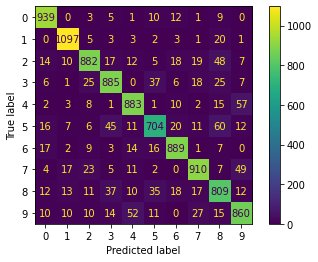

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm= confusion_matrix(test_y,test_preds)
cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()

In [15]:
from sklearn.metrics import classification_report
print(classification_report(test_y, test_preds))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       980
           1       0.95      0.97      0.96      1135
           2       0.90      0.85      0.88      1032
           3       0.87      0.88      0.87      1010
           4       0.89      0.90      0.89       982
           5       0.86      0.79      0.82       892
           6       0.91      0.93      0.92       958
           7       0.90      0.89      0.89      1028
           8       0.80      0.83      0.81       974
           9       0.86      0.85      0.85      1009

    accuracy                           0.89     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.89      0.89      0.89     10000



In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("F1 score: %f"%f1_score(test_y,test_preds,average='micro'))
print("Precision score: %f"%precision_score(test_y,test_preds,average='micro'))
print("Recall score: %f"%recall_score(test_y,test_preds,average='micro'))

F1 score: 0.885800
Precision score: 0.885800
Recall score: 0.885800


In [17]:

print("F1 score: %f"%f1_score(test_y,test_preds,average='macro'))
print("Precision score: %f"%precision_score(test_y,test_preds,average='macro'))
print("Recall score: %f"%recall_score(test_y,test_preds,average='macro'))

F1 score: 0.883948
Precision score: 0.884473
Recall score: 0.884011


### Plotting predictions

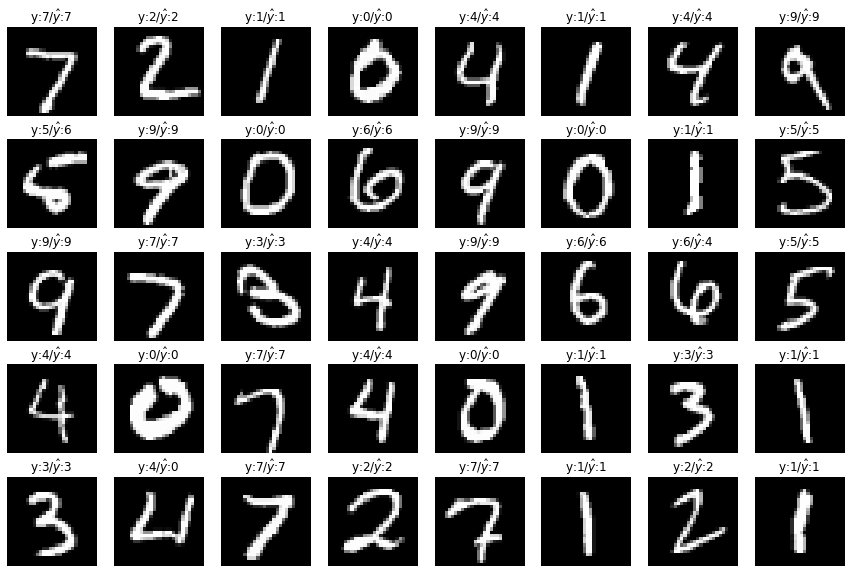

In [18]:
fig= plt.figure(figsize=(15,10))
for i in range(40):
  ax=fig.add_subplot(5,8,i+1)
  ax.imshow(test_X[i],cmap=plt.get_cmap('gray'))
  ax.set_title(f'y:${test_y[i]}$/'+'$\hat{y}$:'+f'{test_preds[i]}')
  plt.axis('off')

# K Nearest Neigbours(k-NN)

In [19]:
import seaborn as sns
plt.style.use('seaborn')

from scipy import stats
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split

## Distance Computation

In [55]:
def EuclideanDistance(x1,x2):
  dist = np.sum((x1-x2)**2,axis=1)
  return dist

def ManhattanDistance(x1,x2):
  dist = np.sum(np.abs(x1-x2),axis=1)
  return dist

## KNN Implementation

In [56]:
class KNN:
  def __init__(self,k,distance_metric=EuclideanDistance, task_type="Classification"):
    #1. Set k to desired value i.e how many neigbours be allowed to participate in prediction
    self._k = k
    self._distance_metric = distance_metric
    self._task_type= task_type

  def fit(self,X,y):

    #fitting model on data only requires copying the data
    self._X = X
    self._y=y

  def predict(self,newExample):
    #2. Calculate the distance between the newexample and every example from 
    # the data. Thus creates a distance vector
    distance_vector = self._distance_metric(self._X,newExample)

    #3. Get indices of nearest k neigbours
    k_nearest_neigbours_indices = np.argpartition(distance_vector,self._k)[:self._k]

    #4. Get the labels of the selected labels
    k_nearest_neigbours = self._y[k_nearest_neigbours_indices]

    #5. If it is a classification task return the majority class by computing
    #mode of the **k** labels
    if self._task_type == 'Classification':
      label = stats.mode(k_nearest_neigbours)[0]

    #if the task is regression the return
    #the average of labels of nearest neigbours
    else:
      label =k_nearest_neigbours.mean()

    return label, k_nearest_neigbours
  
  def eval(self,X_test,y_test):

    if self._task_type=="Classification":
      y_predicted=np.zeros(y_test.shape)
      for i in range(y_test.shape[0]):
        y_predicted[i],_ = self.predict(X_test[i,:])
      error = np.mean(y_test==y_predicted,axis=0)
    else:
      y_predicted = np.zeros(y_test.shape)
      for i in range(y_test.shape[0]):
        y_predicted[i],_=self.predict(X_test[i,:])
      error_vector = y_predicted-y_test
      error = np.sqrt((error_vector.T@error_vector)/error_vector.ravel().shape[0])
    return error


## Classification

### Simple Descision boundary

In [23]:
#generate srtificical data points
X,y = make_blobs(n_samples=100,
                 n_features=2,
                 centers=[[0,0],[5,5]],
                  cluster_std=1,
                  random_state=12)

In [24]:
X.shape


(100, 2)

In [25]:
y.shape

(100,)

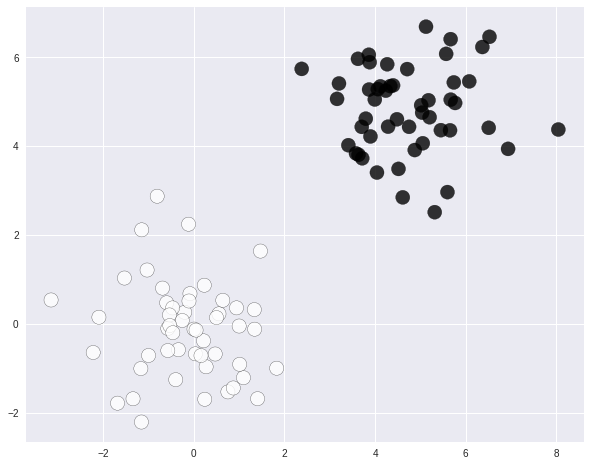

In [33]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(X[:,0],X[:,1],marker='o',edgecolor='k',
            c=y,s=200,alpha=0.8)
plt.show()

In [36]:
newExample = np.array([2.2,2.2])
model= KNN(3,distance_metric=EuclideanDistance)
model.fit(X,y)
prediction, nearest_neighbours_indices = model.predict(newExample.reshape(1,2))

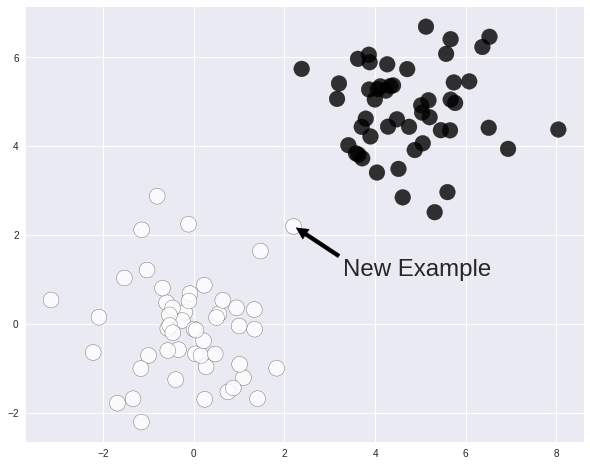

In [39]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(X[:,0],X[:,1],marker='o',edgecolor='k',
            c=y,s=250,alpha=0.8)
plt.scatter(newExample[0],newExample[1],marker='o',edgecolor='k',
            c='white',s=250,alpha=0.8)
plt.annotate('New Example', xy=newExample,
             xytext=(50,-50),textcoords = 'offset points',
             arrowprops=dict(facecolor='black',shrink=0.05),fontsize=24)
plt.show()


Find 3 nearest neigbours

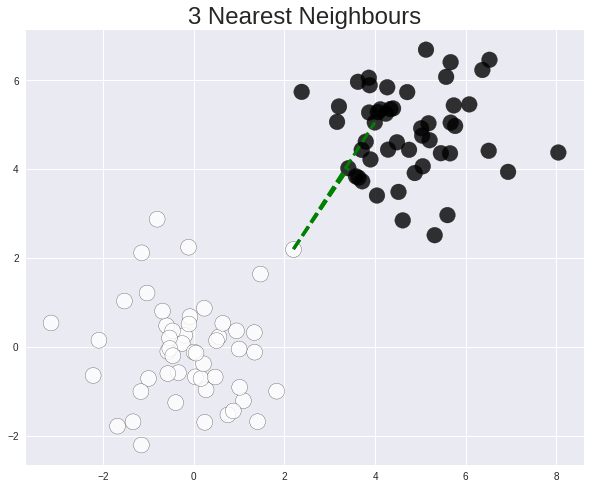

In [42]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(X[:,0],X[:,1],marker='o',edgecolor='k',
            c=y,s=250,alpha=0.8)
plt.scatter(newExample[0],newExample[1],marker='o',edgecolor='k',
            c='white',s=250,alpha=0.8)

for xi in X[nearest_neighbours_indices]:
  plt.plot([newExample[0],xi[0]], [newExample[1],xi[1]],'g--',linewidth=3)
plt.title("3 Nearest Neighbours",fontsize=24)
plt.show()

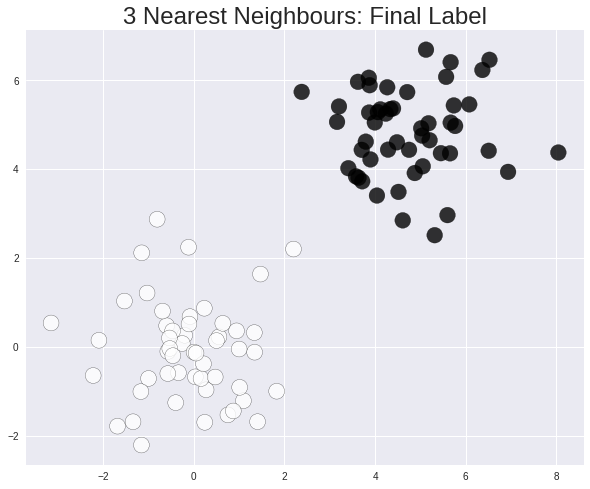

In [43]:
plt.figure(figsize=(10,8))
plt.grid(True)
tx =np.concatenate((X,newExample.reshape(1,2)),axis=0)
ty= np.concatenate((y,prediction),axis=0)
plt.scatter(tx[:,0],tx[:,1],marker='o',c=ty,s=250,
            edgecolor='k',alpha=0.8)
plt.title("3 Nearest Neighbours: Final Label", fontsize=24)
plt.show()

In [44]:
def draw_decision_boundary(model, axis_chart, num_points=201, opacity=0.05):
  tx= np.linspace(np.min(model._X[:,0], axis=0)-2,
                  np.max(model._X[:,0], axis=0)+2, num_points)
  ty= np.linspace(np.min(model._X[:,1], axis=0)-2,
                  np.max(model._X[:,1], axis=0)+2, num_points)
  xx,yy = np.meshgrid(tx,ty)
  grid_prediction = np.zeros(xx.shape)

  for i in range(num_points):
    for j in range(num_points):
      grid_prediction[i][j],_ = model.predict([xx[i][j],yy[i][j]])
  axis_chart.scatter(xx.ravel(), yy.ravel(),
                     c=grid_prediction.ravel(), alpha=opacity)


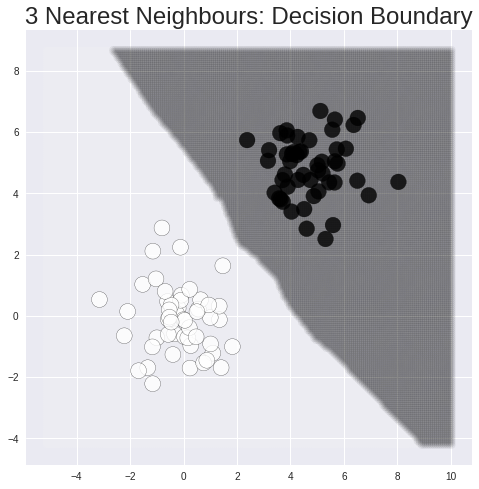

In [45]:
plt.figure(figsize=(8,8))
current_axis = plt.gca()
plt.grid(True)

draw_decision_boundary(model, current_axis)
plt.scatter(X[:,0],X[:,1],marker='o',edgecolor='k',
            c=y,s=250,alpha=0.8)
plt.title("3 Nearest Neighbours: Decision Boundary", fontsize=24)
plt.show()


#### Example-2: Complex Decision Boundary

In [46]:
def maketwospirals(num_points=1000, rotations=2,noise=5):
  pass



## Regressiom

In [47]:
np.random.seed(42)
w1=3
w0=4
n=100
X=2*np.random.rand(n,)
y=w0+w1*X+np.random.randn(n,)

In [48]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

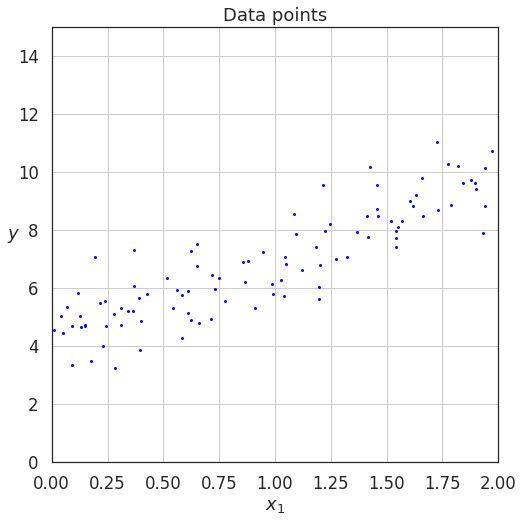

In [52]:
sns.set_style("white")
f= plt.figure(figsize=(8,8))
sns.set_context("notebook",font_scale=1.5,rc={"lines.linewidth":2.5})

plt.plot(X,y,"b.")
plt.title("Data points")
plt.grid(True)
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

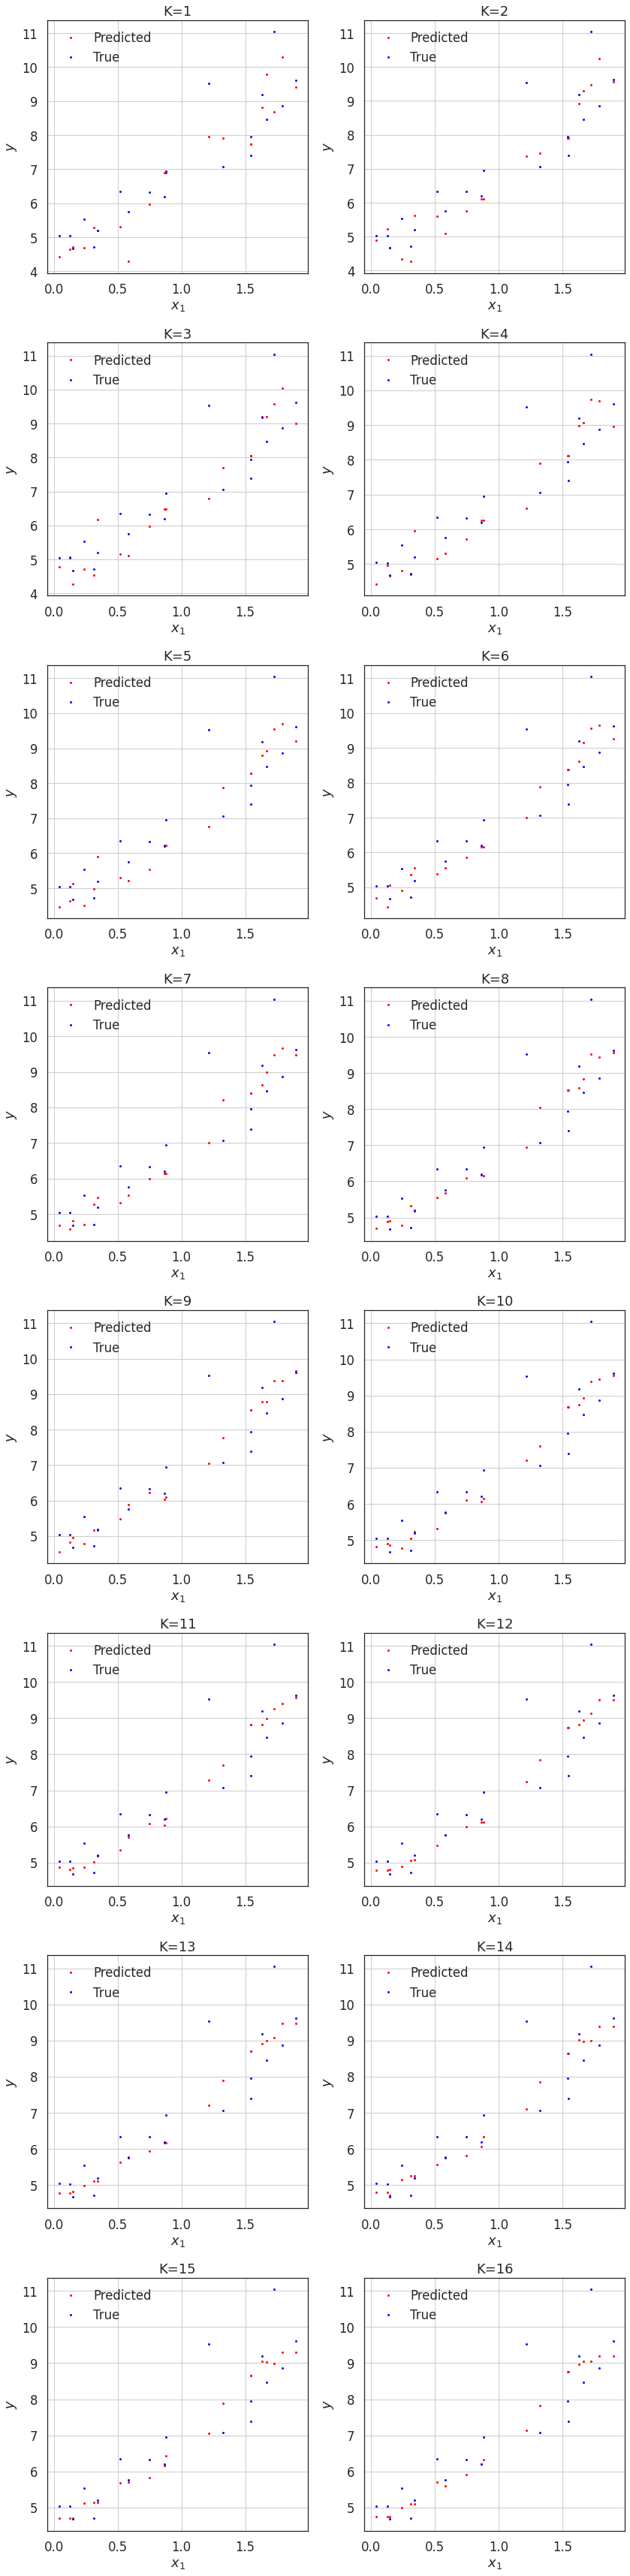

In [57]:
figure, axis = plt.subplots(8,2,figsize=(12,48))
axis = axis.ravel()
error_list=[]
for i in range(16):
  #create model with specific value of K
  model = KNN(i+1, task_type='Regression')

  #fit the model
  model.fit(X_train, y_train)

  #creater the vector to store the predictions
  y_test_predicted = np.zeros_like(y_test)
  for j in range(X_test.shape[0]):
    y_test_predicted[j],_ =model.predict(X_test[j,:])

  error_list.append(np.sum(np.power(y_test-y_test_predicted,2)))

  #plot predictions
  axis[i].plot(X_test,y_test_predicted,"r.")

  #plot grid truth
  axis[i].plot(X_test,y_test,"b.")
  axis[i].legend(["Predicted","True"])

  axis[i].set_title(f"K={i+1}")

  axis[i].grid(True)
  axis[i].set(xlabel='$x_1$',ylabel='$y$')
figure.tight_layout()
plt.show()

Text(0, 0.5, 'Error')

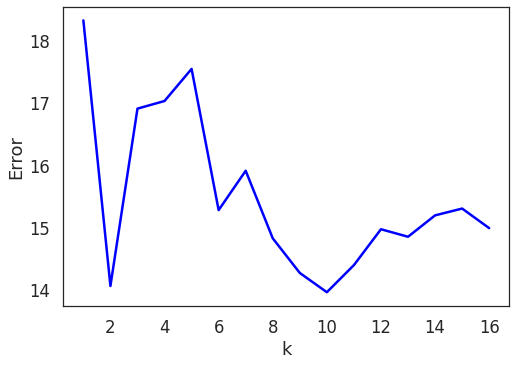

In [58]:
plt.plot(np.arange(len(error_list))+1,error_list,'b-')
plt.xlabel("k")
plt.ylabel("Error")

# Assignment

## Practice Assignment

In [2]:
import numpy as np

In [61]:
def one_hot(y):
  #Your code
  class_indices = len(y)
  encoder = np.eye(class_indices)
  M =encoder[y]
  
  return M

In [63]:
y=np.array([8,6,3])
class_ind = len(y)
np.eye(class_ind)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [42]:
y=np.array([8,6,3])
len(np.unique(y))

3

In [43]:
def convert_to_one_hot_encoding(y):
  #A zero matrix of size (m,k)
  y_one_hot= np.zeros((len(np.unique(y)),len(y)))
  #Putting 1 for column where the label is using multidimensional indexing
  idx=np.arange(len(np.unique(y)))
  y_new=np.unique(y)
  d={}
  for i in range(len(y_new)):
    d[y_new[i]]=idx[i]
  li=[]
  for el in y:
    li.append(d[el])
  
  y_one_hot[li,np.arange(len(y))]=1
  return y_one_hot

In [46]:
def one_hot(y):
  idx = np.arange(len(np.unique(y)))
  d={}
  y_unique = np.unique(y)
  for i in range(len(np.unique(y))):
    d[y_unique[i]]=idx[i]
  li=[d[x] for x in y]
  li=np.array(li)
  b = np.zeros((li.size, li.max()+1))
  b[np.arange(li.size),li] = 1
  return b
  


In [47]:
one_hot(y)

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [8]:
idx=np.arange(len(np.unique(y)))

In [9]:
d={}
for i in range(len(y_new)):
  d[y_new[i]]=idx[i]

In [10]:
d[n]

{3: 0, 6: 1, 8: 2}

In [20]:
li=[]
for el in y:
  li.append(d[el])


In [25]:
np.array(li)

array([2, 1, 0, 2])

In [10]:
z=np.array([1,0,-1,3])

In [11]:
exp = np.exp(z)

In [5]:
exp

array([0.13533528, 0.04978707, 0.01831564, 1.        ])

In [12]:
for i in range(len(z)):
  exp[i]/=np.sum(exp)

In [13]:
exp

array([0.11245721, 0.04636956, 0.01784762, 0.9912806 ])

In [14]:
def softmax(z):
    exp = np.exp(z)
    return exp/np.sum(exp)

In [15]:
z=np.array([1,0,-1,3])

In [16]:
softmax(z)

array([0.11245721, 0.0413707 , 0.01521943, 0.83095266])

In [27]:
def euclid(a, b):
    return np.sum((a - b) ** 2, axis=1)

def manhattan(a, b):
    return np.sum(abs(a - b), axis=1)

In [24]:
X=np.array([[3,3],[4,2],[5,4],[3,8],[5,6],[5,8]])
y=np.array([2,2,2,1,1,1])

In [25]:
newExample=np.array([2,6])

In [30]:
points = dict(zip(euclid(X,newExample),y))
least_3=sorted(points.items())[:3]
least_4=sorted(points.items())[:4]

In [29]:
least_3

[(5, 1), (9, 1), (10, 2)]

In [31]:
least_4

[(5, 1), (9, 1), (10, 2), (13, 1)]

In [32]:
X=np.array([[-8,20],[-12,11],[0,26],[-5,5],[-1,22],[-7,1]])
y=np.array([0.4,0.6,0.1,1.0,0.8,-0.3])
newExample=np.array([-10,0])

In [33]:
points = dict(zip(euclid(X,newExample),y))
least_3=sorted(points.items())[:3]

In [34]:
least_3

[(10, -0.3), (50, 1.0), (125, 0.6)]

In [35]:
def euclid2(a,b):
  d=np.sum((a-b)**2)
  return np.sqrt(d)
def manhattan(a,b):
  return np.sum(np.abs(a-b))

In [37]:
x=np.array([3,-45 ,96 ,56 ,-3.9])
y=np.array([33,-102,7,0.7,-10])

In [38]:
euclid2(x,y)

123.1474725684616

In [39]:
manhattan(x,y)

237.4

In [40]:
manhattan(np.array([1,0,1]),np.array([2,0,0]))

2

In [41]:
z=np.array([1,2,-1,3])

In [42]:
softmax(z)

array([0.08894682, 0.24178252, 0.01203764, 0.65723302])

In [43]:
z=[2.1,4.8,3.5]
softmax(z)

array([0.0501632 , 0.74641498, 0.20342181])